In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets

In [3]:
data = pd.read_csv("OverallDataForCompare.csv")

In [4]:
data.head()

,Geo,Country,BRET Total Revenue,BRET Abs Margin Max,BRET Abs Margin Avg,BRET Abs Margin Sum
0,CE,AL,116750,24750,17469,34939
1,EA,DZ,33503273,683705,109046,5452297
2,EA,AO,2339501,106200,77623,543358
3,LA,AR,15775886,804772,55170,3365398
4,CE,AZ,1489034,44750,29721,356654


In [6]:
data= data.drop(['BRET Total Revenue'],axis = 1)

In [7]:
data1 = pd.get_dummies(data, columns=['Geo','Country'])

In [9]:
x = scale(data1)

In [10]:
clustering = KMeans(n_clusters = 5, random_state=1)

In [11]:
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [12]:
clustering.labels_

array([0, 2, 2, 3, 0, 2, 2, 0, 3, 0, 2, 3, 0, 2, 2, 3, 1, 3, 3, 2, 0, 0,
       0, 2, 0, 2, 4, 3, 0, 0, 3, 2, 4, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 0, 2])

In [13]:
%matplotlib inline

In [14]:
y = pd.DataFrame(clustering.labels_)
y.columns = ['Sub-group']

In [15]:
y.head()

,Sub-group
0,0
1,2
2,2
3,3
4,0


In [16]:
data['Sub_group'] = y['Sub-group']

In [17]:
data.head()

,Geo,Country,BRET Abs Margin Max,BRET Abs Margin Avg,BRET Abs Margin Sum,Sub_group
0,CE,AL,24750,17469,34939,0
1,EA,DZ,683705,109046,5452297,2
2,EA,AO,106200,77623,543358,2
3,LA,AR,804772,55170,3365398,3
4,CE,AZ,44750,29721,356654,0


In [18]:
data.to_csv("subgroup.csv")

Text(0.5,1,'This is actual data set ')

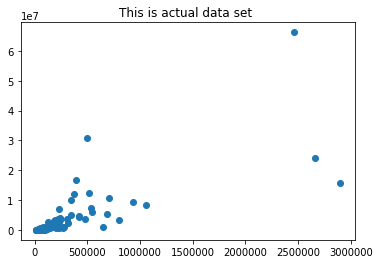

In [57]:
plt.scatter(x=data['BRET Abs Margin Max'], y = data['BRET Abs Margin Sum'])
plt.title ("This is actual data set ")

In [53]:
import numpy as np
color = np.array(['red','blue','green','black'])

In [50]:
color[0]

'red'

In [56]:
plt.scatter(x=data['BRET Abs Margin Max'], y = data['BRET Abs Margin Sum'], c= color['clustering.labels_'])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices